# Deterministic description

This notebook is an interactive version of the paper's code base.

Feel free to explore the system's evolution for different parameter values.

In general, the notebook contains:
* Solution of the ODEs 
* Visualisation of the trajectory
* Quantification of numerical measures
    * Lyapunov exponents
    * Fractal dimension
    * Fourier Spectrum
    * Standard deviation


In [10]:
using DrWatson
@quickactivate "ChaosNoiseEGT"

include(srcdir("PayoffMatrix.jl"))
include(srcdir("DeterministicSRC.jl"))
include(srcdir("Graphs.jl"))
include(srcdir("Quantifiers.jl"))

using DynamicalSystems
using PyPlot

### Payoff matrix
Payoff matrix of the ACT/Skyrms attractor

In [11]:
display(payoff_matrix)

4×4 Matrix{Float64}:
  0.0   -0.6  0.0   1.0
  1.0    0.0  0.0  -0.5
 -1.05  -0.2  0.0   1.75
  0.5   -0.1  0.1   0.0

## --> Set parameters (interactive!)
You can freely modify the following parameter(s):

* $\beta$: selection intensity coefficient

In [12]:
B = 0.1

0.1

### Initial conditions

The initial conditions can be freely modified. 

The ACT/Skyrms' attractor can be properly seen starting with initial conditions close to the center of the simplex.
Therefore, for a robust analysis of the attractor we recommend the following initial conditions:
`ini_con = [0.25,0.25,0.25,0.25]`

_Note: the sum of all initial conditions should be equal to 1. (The quantities represent frequencies/relative amounts, therefore they should be normalised.)_



In [13]:
ini_con = [0.25,0.25,0.25,0.25]

4-element Vector{Float64}:
 0.25
 0.25
 0.25
 0.25

### Generalised pairwise comparison process
Compact implementation of the set of ordinary differential equations (ODEs) used for the deterministic description.

$$\dot{x_i} = \sum_{j=1}^{d} x_ix_j\tanh\left[\frac{\beta}{2}(f_i(\vec{x}) - f_j(\vec{x}))\right] \hspace{5mm} i=1,..,d$$

The parameter(s) value and the initial conditions are already included in `ODE_sys`.

In [14]:
ODE_sys = ContinuousDynamicalSystem(dynamic_rule_PCP!, ini_con, B)

4-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  dynamic_rule_PCP!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    0.1
 time:          0.0
 state:         [0.25, 0.25, 0.25, 0.25]


Solution of the ODE system for the stated parameter(s) and initial condition values.

In [15]:
Data, t = generate_trajectory(ODE_sys, B)
Data

4-dimensional StateSpaceSet{Float64} with 100001 points
 0.25      0.25       0.25       0.25
 0.249766  0.250076   0.25008    0.250077
 0.249532  0.250149   0.250165   0.250153
 0.249299  0.250219   0.250255   0.250228
 0.249067  0.250285   0.250348   0.2503
 0.248835  0.250347   0.250447   0.250372
 0.248603  0.250406   0.250549   0.250441
 0.248372  0.250462   0.250656   0.25051
 0.248142  0.250514   0.250767   0.250577
 0.247912  0.250563   0.250883   0.250642
 ⋮                               
 0.562667  0.0865606  0.0255252  0.325247
 0.562561  0.087095   0.0251253  0.325219
 0.562447  0.0876326  0.0247316  0.325189
 0.562325  0.0881733  0.0243442  0.325158
 0.562195  0.0887171  0.0239629  0.325125
 0.562057  0.0892642  0.0235876  0.325092
 0.561911  0.0898144  0.0232183  0.325056
 0.561757  0.0903679  0.0228549  0.32502
 0.561596  0.0909245  0.0224972  0.324982

## Visualisation of the trajectory
* Ternary plot
* Time series

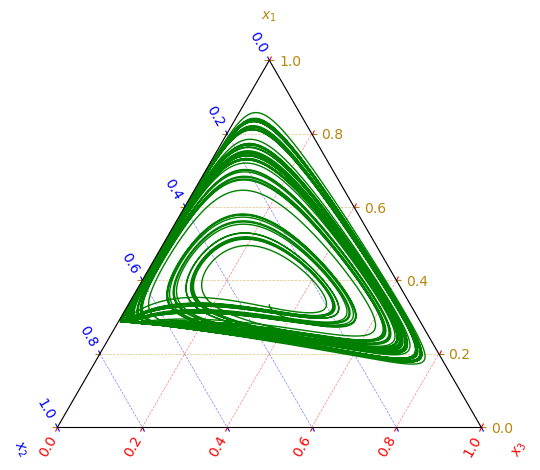

In [7]:
ternary_plot(Data[:,1],Data[:,2],Data[:,3])
gcf()
